# Model Data
This notebook imports the cleaned dataframe and fits and initial random forest model to the training data. Then we evaluate the success of the model.

In [1]:
# load necessary modules --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# read in field players dataframe build for modeling --- 
model_field_df = pd.read_csv('write_data/model_field_players.csv').set_index('player_name')

In [3]:
# train, test, split the data and make the classification the target ---
X = model_field_df.drop(['classification'], axis=1)
y = model_field_df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=1)

In [4]:
# define classification model as Random Forest and adjust parameters ---
rf = RandomForestClassifier(n_estimators=300, max_features='sqrt', random_state=10)

In [5]:
# fit training data to random forest model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [6]:
# Check score on the test data for accuracy
rf.score(X_test, y_test)

0.9427235534774986

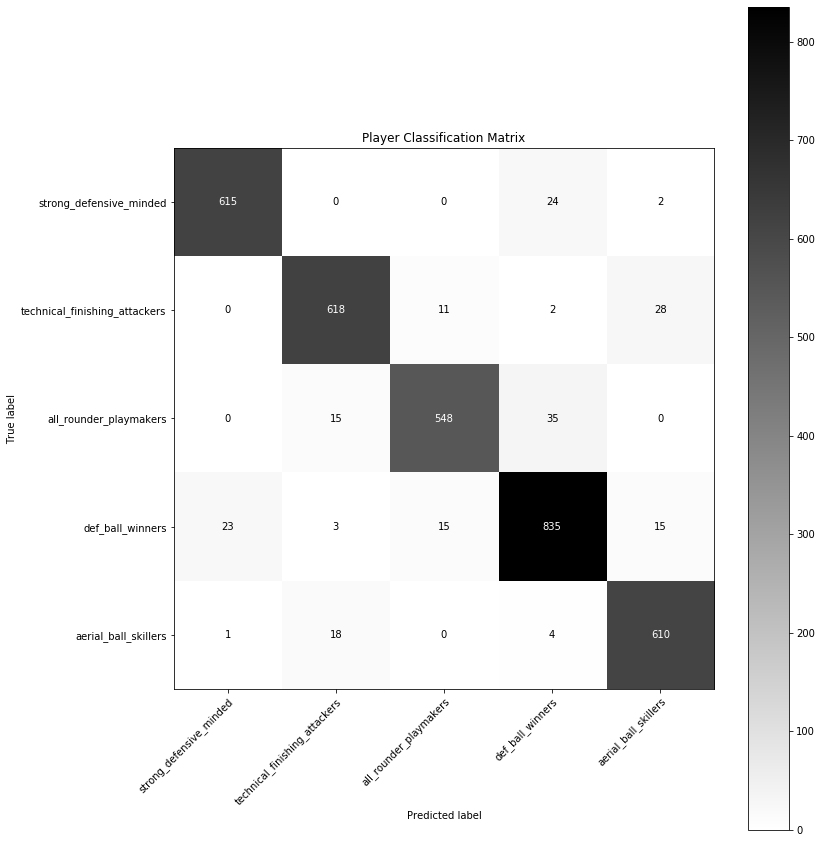

In [8]:
# plot a confusion matrix to evaluate model accuracy and check if inaccuracy is
y_pred = rf.fit(X_train, y_train).predict(X_test)

title = 'Player Classification Matrix'
classes = ['strong_defensive_minded', 
           'technical_finishing_attackers',
           'all_rounder_playmakers',
           'def_ball_winners',
          'aerial_ball_skillers']
cmap = plt.cm.binary
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))

im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
      yticks=np.arange(cm.shape[0]),
      xticklabels=classes,
      yticklabels=classes,
      title=title,
      ylabel='True label',
      xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.plot();

In [ ]:
# replace values in classification column
player_classifications = {0 : 'strong_defensive_minded',
                          1 : 'technical_finishing_attackers',
                          2 : 'all_rounders_passers',
                          3 : 'def_ball_winners',
                          4 : 'aerial_ball_skiller'}

class_field_players = model_field_df.replace(player_classifications)

In [ ]:
# write csv with every feature represented for deployment later
class_field_players.to_csv('write_data/class_field_players.csv')